In [29]:
library(ArchR)
library(stringr)
library(ggplot2)
library(dplyr)
library(glue)
library(parallel)
library(Seurat)
library(SeuratDisk)
library(GenomicRanges)
library(HDF5Array)
library(SummarizedExperiment)
library(Signac)
library(data.table)


In [6]:
addArchRThreads(threads = 20) 

Setting default number of Parallel threads to 20.



In [12]:
proj <- loadArchRProject('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/ATAC/data/ATAC_FINAL')

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Fig. 5c peak2gene heatmap

In [ ]:
source('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/misc/girgenti_project/ArchR/R/ColorPalettes.R')

In [21]:
p <- plotPeak2GeneHeatmap(ArchRProj = proj, groupBy = "Int_Cluster", k=20, palGroup=ArchRPalettes$celltype, limitsATAC = c(-1.5, 1.5), limitsRNA = c(-1.5, 1.5))

ArchR logging to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-2f3ce82e19188c-Date-2024-09-13_Time-17-34-21.1879.log
If there is an issue, please report to github with logFile!

2024-09-13 17:35:32.588675 : Determining KNN Groups!, 1.19 mins elapsed.

2024-09-13 17:36:20.625185 : Ordering Peak2Gene Links!, 1.991 mins elapsed.

Warning message:
“did not converge in 10 iterations”
2024-09-13 17:51:19.471332 : Constructing ATAC Heatmap!, 16.971 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

2024-09-13 17:51:20.079572 : Constructing RNA Heatmap!, 16.982 mins elapsed.

Adding Annotations..

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotPeak2GeneHeatmap-2f3ce82e19188c-Date-2024-09-13_Time-17-34-21.1879

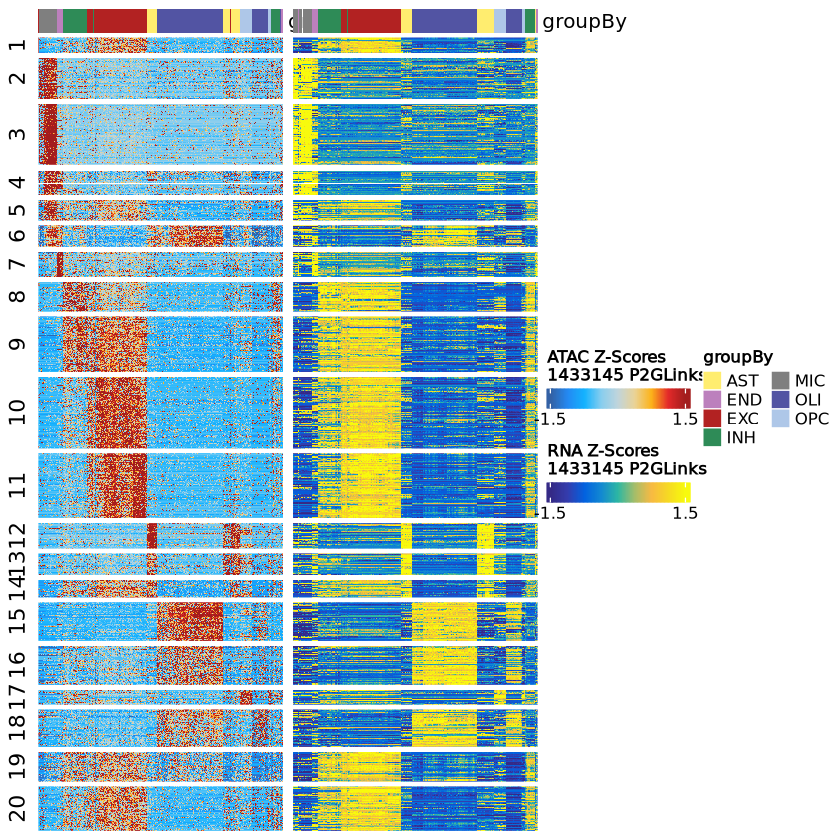

In [22]:
p

In [23]:
plotPDF(p, 
    name = "atac_rna_heatmap.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 7, height = 10)

Plotting ComplexHeatmap!



# Fig. 5f FKBP5 ATAC UMAP

In [24]:
p <- plotEmbedding(
        ArchRProj = proj, 
        colorBy = "GeneScoreMatrix", 
        name = 'FKBP5', 
        embedding = "UMAP",
        imputeWeights = getImputeWeights(proj),
        pal = ArchRPalettes$whiteBlue
    )

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2f3ce85c107747-Date-2024-09-13_Time-17-54-42.604554.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-09-13 17:54:53.772277 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2f3ce85c107747-Date-2024-09-13_Time-17-54-42.604554.log



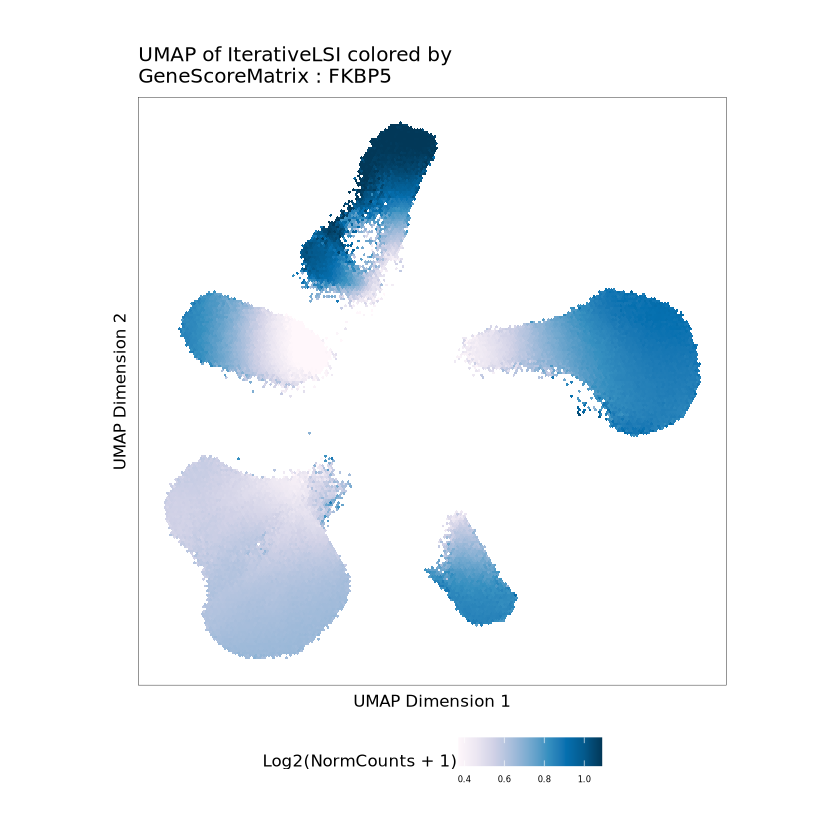

In [28]:
p

# Fig. 5g FKBP5 track 

In [36]:
source('../utils/ArchRBrowser-FKBP5.R')

In [37]:
p2g <- getPeak2GeneLinks(proj,resolution = NULL, corCutOff=0.75, FDRCutOff=0.05,returnLoops = T)
df <- data.frame(p2g$Peak2GeneLinks)

In [40]:
loops <- df[df$seqnames=='chr6' & df$start > 35700000 & df$start < 35800000,]

In [41]:
end <- df[df$end==35728583,]

In [42]:
start <- df[df$start==35728583,]

In [43]:
loops <- rbind(end,start)

In [44]:
loops <- loops[,c('seqnames','start','end','value')]

In [45]:
loops

,seqnames,start,end,value
,<fct>,<int>,<int>,<dbl>
121947,chr6,34273401,35728583,0.7519178
121956,chr6,34300586,35728583,0.7729057
121977,chr6,34332442,35728583,0.7779112
122389,chr6,34836179,35728583,0.8073340
122471,chr6,34955622,35728583,0.7882086
122475,chr6,34958888,35728583,0.7987621
122498,chr6,35081639,35728583,0.7643539
122521,chr6,35297780,35728583,0.7654842
122602,chr6,35298283,35728583,0.7644450


In [46]:
peaks <- data.frame(getPeakSet(proj))

In [47]:
p2geneDF <- metadata(proj@peakSet)$Peak2GeneLinks
p2geneDF$geneName <- mcols(metadata(p2geneDF)$geneSet)$name[p2geneDF$idxRNA]
p2geneDF$peakName <- (metadata(p2geneDF)$peakSet %>% {paste0(seqnames(.), "_", start(.), "_", end(.))})[p2geneDF$idxATAC]
p2geneDF[c('chr', 'start', 'end')] <- str_split_fixed(p2geneDF$peakName, '_', 3)

In [48]:
fkbp5_peaks <- p2geneDF[p2geneDF$geneName=='FKBP5',]

In [49]:
fkbp5_peaks <- fkbp5_peaks[fkbp5_peaks$Correlation > 0.75,]

In [50]:
peaks <- c()
for (e in fkbp5_peaks$end) {
    for (f in loops$end) {
        diff <- as.numeric(e)-as.numeric(f)
        if ((diff==250) | (diff==-250)) {
            print(fkbp5_peaks[fkbp5_peaks$end==e,])
            peaks <- append(peaks,fkbp5_peaks[fkbp5_peaks$end==e,]$peakName)
            }
        }
    }

DataFrame with 1 row and 11 columns
    idxATAC    idxRNA Correlation         FDR  VarQATAC   VarQRNA geneName
  <integer> <integer>   <numeric>   <numeric> <numeric> <numeric>  <array>
1    160759     14610    0.750675 6.61994e-18  0.463253  0.961314    FKBP5
                peakName         chr       start         end
             <character> <character> <character> <character>
1 chr6_36312669_36313169        chr6    36312669    36313169
DataFrame with 1 row and 11 columns
    idxATAC    idxRNA Correlation        FDR  VarQATAC   VarQRNA geneName
  <integer> <integer>   <numeric>  <numeric> <numeric> <numeric>  <array>
1    160805     14610    0.775225 9.8228e-20   0.51029  0.961314    FKBP5
                peakName         chr       start         end
             <character> <character> <character> <character>
1 chr6_36570197_36570697        chr6    36570197    36570697
DataFrame with 1 row and 11 columns
    idxATAC    idxRNA Correlation         FDR  VarQATAC   VarQRNA geneName
  <i

In [51]:
p <- data.frame(peaks)

In [52]:
p[c('seqnames', 'start', 'end')] <- str_split_fixed(p$peaks,'_',3)

In [53]:
GRanges(p)

GRanges object with 26 ranges and 1 metadata column:
       seqnames            ranges strand |                  peaks
          <Rle>         <IRanges>  <Rle> |            <character>
   [1]     chr6 36312669-36313169      * | chr6_36312669_36313169
   [2]     chr6 36570197-36570697      * | chr6_36570197_36570697
   [3]     chr6 36622814-36623314      * | chr6_36622814_36623314
   [4]     chr6 36623340-36623840      * | chr6_36623340_36623840
   [5]     chr6 36627675-36628175      * | chr6_36627675_36628175
   ...      ...               ...    ... .                    ...
  [22]     chr6 37115486-37115986      * | chr6_37115486_37115986
  [23]     chr6 37187196-37187696      * | chr6_37187196_37187696
  [24]     chr6 37240129-37240629      * | chr6_37240129_37240629
  [25]     chr6 37269834-37270334      * | chr6_37269834_37270334
  [26]     chr6 37583157-37583657      * | chr6_37583157_37583657
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [35]:
p <- plotBrowserTrackFKBP5(
    ArchRProj = proj, 
    groupBy = "Int_Cluster", 
    useGroups = c('EXC','INH','OLI','OPC','END','AST','MIC'),
    region = GRanges(seqnames = 'chr6',ranges = IRanges(start=35200000,end=35900000)), 
    loops = GRanges(loops),
    plotSummary = c("bulkTrack", "loopTrack","geneTrack"),
    sizes = c(3, 0.5, 1),
    tileSize=1000,
    ylim2 = c(0,0.8),
    pal=c('#b22222','#2E8B57','#5254a3','#aec7e8','#bc80bd','#ffed6f','#7f7f7f'),
    baseSize=10,
    borderWidth=1
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-2fa9da3cb81418-Date-2024-08-06_Time-22-51-07.430191.log
If there is an issue, please report to github with logFile!

2024-08-06 22:51:07.74609 : Validating Region, 0.006 mins elapsed.

2024-08-06 22:51:07.758479 : Adding Bulk Tracks (1 of 1), 0.006 mins elapsed.



In [54]:
p <- plotBrowserTrackFKBP5(
    ArchRProj = proj, 
    groupBy = "Int_Cluster", 
    useGroups = c('EXC','INH','OLI','OPC','END','AST','MIC'),
    region = GRanges(seqnames = 'chr6',ranges = IRanges(start=35200000,end=35900000)), 
    loops = GRanges(loops),
    features=GRanges(p),
    plotSummary = c("bulkTrack", "loopTrack",'featureTrack',"geneTrack"),
    sizes = c(3, 0.5, 0.25, 1),
    tileSize=1000,
    ylim2 = c(0,0.8),
    pal=c('#b22222','#2E8B57','#5254a3','#aec7e8','#bc80bd','#ffed6f','#7f7f7f'),
    baseSize=10,
    borderWidth=1
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-2f3ce8589901ae-Date-2024-09-13_Time-18-03-11.298624.log
If there is an issue, please report to github with logFile!

2024-09-13 18:03:11.700607 : Validating Region, 0.007 mins elapsed.

2024-09-13 18:03:11.710094 : Adding Bulk Tracks (1 of 1), 0.007 mins elapsed.

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
2024-09-13 18:05:39.935221 : Adding Feature Tracks (1 of 1), 2.477 mins elapsed.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
2024-09-13 18:05:40.114333 : Adding Loop Tracks (1 of 1), 2.48 mins elapsed.

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”
2024-09-13 18:05:40.972136 : Adding Gene Trac

In [55]:
plotPDF(p, 
    name = "FKBP5_track_0.75.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 8, height = 4)

Plotting Gtable!



NULL


# Fig. 1a peak2gene icon

In [28]:
genes_df = data.frame(getGenes(proj))
genes_df = na.omit(genes_df[genes_df$symbol=='CAMKV',])

p2g <- getPeak2GeneLinks(proj,resolution = NULL, corCutOff = 0.6, FDRCutOff=0.1, returnLoops = T)
df <- data.frame(p2g$Peak2GeneLinks)
loops <- df[df$seqnames==df$seqnames & df$start > df$start - 50000 & df$end < df$end + 50000,]

loops <- loops[,c('seqnames','start','end','value')]
dir <- genes_df$strand
if (dir=='-') {
    loops <- rbind(loops[loops$start==genes_df$end,],loops[loops$end==genes_df$end,])
} else {
    loops <- rbind(loops[loops$start==genes_df$start,],loops[loops$end==genes_df$start,])
}
loops

,seqnames,start,end,value
,<fct>,<int>,<int>,<dbl>
156364,chr3,49870222,49870650,0.9242369
156365,chr3,49870222,49871717,0.8209042
156366,chr3,49870222,49872290,0.7323618
156367,chr3,49870222,49896598,0.8933904
156368,chr3,49870222,49900005,0.8842508
156369,chr3,49870222,49900940,0.7298813
156370,chr3,49870222,49901880,0.8933483
156371,chr3,49870222,49903023,0.8940387
156372,chr3,49870222,49906479,0.8509024


In [33]:
p <- plotBrowserTrackFKBP5(
    ArchRProj=proj,
    groupBy='Int_Cluster',
    geneSymbol='CAMKV',
    loops = GRanges(loops),
    plotSummary = c('featureTrack','loopTrack','geneTrack'),
    sizes = c(0.1, 0.2, 0.2),
    borderWidth=1
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-34131365d6f7d-Date-2023-08-31_Time-18-37-43.log
If there is an issue, please report to github with logFile!

2023-08-31 18:37:44 : Validating Region, 0.021 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]     chr3 49857988-49870222      - |       79012       CAMKV
  -------
  seqinfo: 24 sequences from hg38 genome


2023-08-31 18:37:45 : Adding Feature Tracks (1 of 1), 0.023 mins elapsed.

2023-08-31 18:37:45 : Adding Loop Tracks (1 of 1), 0.025 mins elapsed.

2023-08-31 18:37:45 : Adding Gene Tracks (1 of 1), 0.034 mins elapsed.

Warning message in ggrepel::geom_text_repel(data = genesO[which(genesO$strand == :
“Ignoring unknown aesthetics: label.size”
2023-08-31 18:37:46 : Plotting, 0.042 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-34131365d6f7d-Date-2023-08-31_Time-18-37-43.log



In [35]:
plotPDF(p, 
    name = "Fig1a_P2G.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 4, height = 2)

Plotting Gtable!



NULL
